# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

from matplotlib import pyplot as plt
%matplotlib inline

data = pd.read_csv("census.csv")
data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# The total number of records
num=data.shape
print('The total number of records:',num[0])


The total number of records: 45222


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [4]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [5]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# The number of individuals making more than $50000 annually
data['income'] = data['income'].astype(str)
count_morethan = len(data[data['income']!= '<=50K'])
count_lessthan =  len(data[data['income']!= '>50K'])
print(count_lessthan)
print('The number of individuals making more than $50000 annually' ,count_morethan)

34014
The number of individuals making more than $50000 annually 11208


In [7]:
# The number of individuals making at most $50000 annually
print('The number of individuals making at most $50000 annually',count_lessthan)

The number of individuals making at most $50000 annually 34014


In [8]:
# The percentage of individuals making at more than $50000 annually
print('The percentage of individuals making at more than $50000 annually',count_morethan/num[0])

The percentage of individuals making at more than $50000 annually 0.2478439697492371


### Exercise 2 Preprocessing 

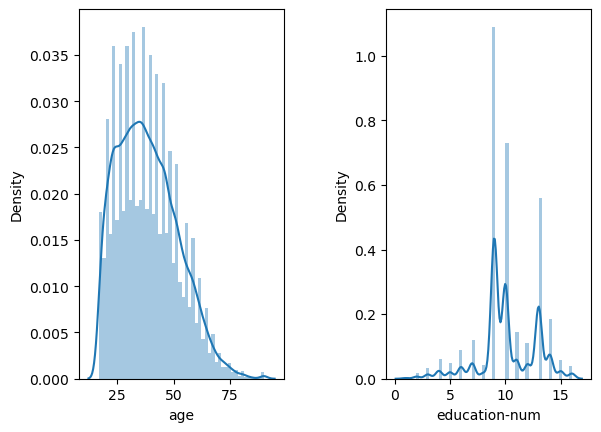

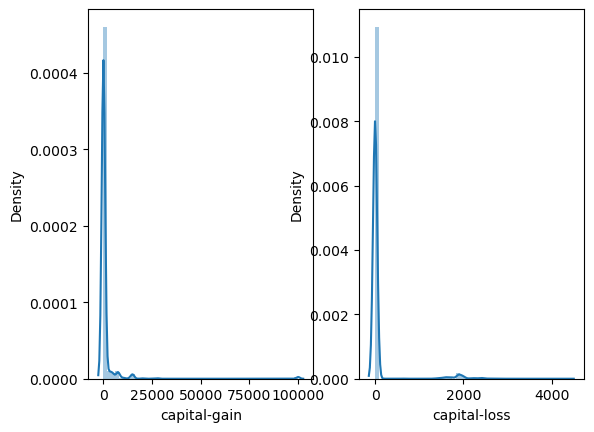

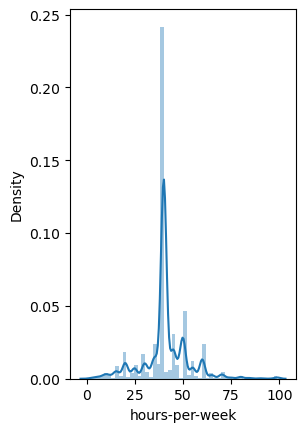

In [9]:
# Visualize skewed continuous features of original data
plt.figure(1)
plt.subplot(121)
sns.distplot(data['age']);

plt.subplot(122)
sns.distplot(data['education-num']);
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.5)  # wspace 控制子图之间的水平间距

plt.figure(2)
plt.subplot(121)
sns.distplot(data['capital-gain']);

plt.figure(2)
plt.subplot(122)
sns.distplot(data['capital-loss']);

plt.figure(3)
plt.subplot(121)
sns.distplot(data['hours-per-week']);


plt.show()


In [10]:
# Outliers Treatment

#age	education-num	capital-gain	capital-loss	hours-per-week
data['sqrt_age'] = np.sqrt(data['age'])
data['log1p_age'] = np.log1p(data['age'])

data['sqrt_education-num'] = np.sqrt(data['education-num'])
data['log1p_education-num'] = np.log1p(data['education-num'])

data['sqrt_capital-gain'] = np.sqrt(data['capital-gain'])
data['log1p_capital-gain'] = np.log1p(data['capital-gain'])

data['sqrt_capital-loss'] = np.sqrt(data['capital-loss'])
data['log1p_capital-loss'] = np.log1p(data['capital-loss'])

data['sqrt_hours-per-week'] = np.sqrt(data['hours-per-week'])
data['log1p_hours-per-week'] = np.log1p(data['hours-per-week'])
data.head()






,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,sqrt_age,log1p_age,sqrt_education-num,log1p_education-num,sqrt_capital-gain,log1p_capital-gain,sqrt_capital-loss,log1p_capital-loss,sqrt_hours-per-week,log1p_hours-per-week
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,...,6.244998,3.688879,3.605551,2.639057,46.626173,7.684784,0.0,0.0,6.324555,3.713572
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,...,7.071068,3.931826,3.605551,2.639057,0.000000,0.000000,0.0,0.0,3.605551,2.639057
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,...,6.164414,3.663562,3.000000,2.302585,0.000000,0.000000,0.0,0.0,6.324555,3.713572
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,...,7.280110,3.988984,2.645751,2.079442,0.000000,0.000000,0.0,0.0,6.324555,3.713572
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,...,5.291503,3.367296,3.605551,2.639057,0.000000,0.000000,0.0,0.0,6.324555,3.713572


In [11]:
columns_to_transform = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for column in columns_to_transform:
    sqrt_column_name = f'sqrt_{column}'
    log1p_column_name = f'log1p_{column}'

    # Square root transformation
    print(f"\n{sqrt_column_name}")
    print("The skewness of the original data is {}".format(data[column].skew()))
    print(f"The skewness of the SQRT transformed data is {data[sqrt_column_name].skew()}")
    print('')
    print("The kurtosis of the original data is {}".format(data[column].kurt()))
    print(f"The kurtosis of the SQRT transformed data is {data[sqrt_column_name].kurt()}")

    # Log1p transformation
    data[log1p_column_name] = np.log1p(data[column])
    print(f"\n{log1p_column_name}")
    print(f"The skewness of the LOG1P transformed data is {data[log1p_column_name].skew()}")
    print('')
    print(f"The kurtosis of the LOG1P transformed data is {data[log1p_column_name].kurt()}")


sqrt_age
The skewness of the original data is 0.5328158942555792
The skewness of the SQRT transformed data is 0.17896737910207108

The kurtosis of the original data is -0.15587445202596184
The kurtosis of the SQRT transformed data is -0.6174947111261537

log1p_age
The skewness of the LOG1P transformed data is -0.13876315481185883

The kurtosis of the LOG1P transformed data is -0.7273915071513848

sqrt_education-num
The skewness of the original data is -0.3106209464770189
The skewness of the SQRT transformed data is -1.02870180202061

The kurtosis of the original data is 0.6351235822012766
The kurtosis of the SQRT transformed data is 2.654113421473252

log1p_education-num
The skewness of the LOG1P transformed data is -1.7429420989003768

The kurtosis of the LOG1P transformed data is 5.825713896728672

sqrt_capital-gain
The skewness of the original data is 11.789002180291192
The skewness of the SQRT transformed data is 5.868301862062873

The kurtosis of the original data is 150.15129227

In [12]:
# according to the value ,we change the dataset as follows

#age	education-num	capital-gain	capital-loss	hours-per-week
data1= data.copy()
data1.drop(columns = ['age','log1p_age' ,'education-num','log1p_education-num' ,'capital-gain','sqrt_capital-gain','capital-loss','sqrt_capital-loss','log1p_hours-per-week','hours-per-week'], inplace=True)
data.drop(columns = ['log1p_age','sqrt_age' ,'log1p_education-num','sqrt_education-num' ,'log1p_capital-gain','sqrt_capital-gain','log1p_capital-loss','sqrt_capital-loss','log1p_hours-per-week','sqrt_hours-per-week'], inplace=True)
data1.dtypes

workclass               object
education_level         object
marital-status          object
occupation              object
relationship            object
race                    object
sex                     object
native-country          object
income                  object
sqrt_age               float64
sqrt_education-num     float64
log1p_capital-gain     float64
log1p_capital-loss     float64
sqrt_hours-per-week    float64
dtype: object

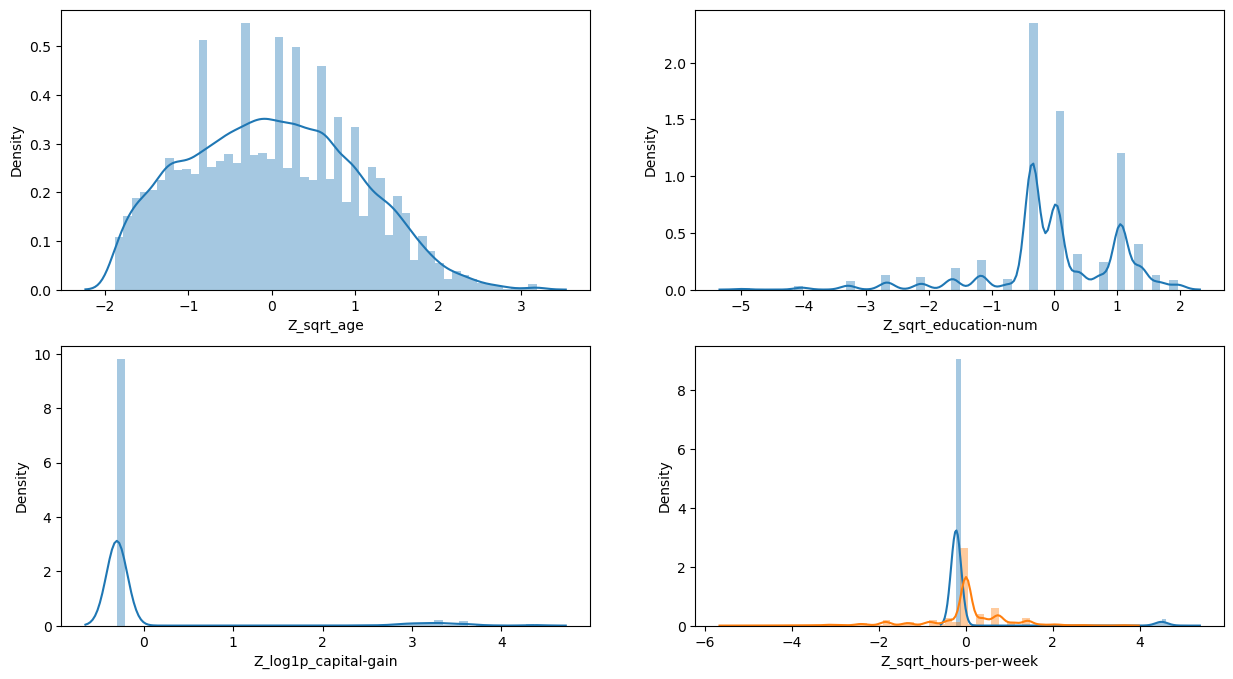

In [13]:
# Data Transformation
data2=data1.copy()
numeral = ['sqrt_age','sqrt_education-num','log1p_capital-gain','log1p_capital-loss','sqrt_hours-per-week']
Z_numeral=['Z_sqrt_age','Z_sqrt_education-num','Z_log1p_capital-gain','Z_log1p_capital-loss','Z_sqrt_hours-per-week']
data2[numeral].head()

from sklearn.preprocessing import StandardScaler

data2[Z_numeral] = StandardScaler().fit_transform(data2[numeral])

data2.head()


# Distribution of the columns

fig, axes = plt.subplots(2,2, figsize=(15,8))

sns.distplot(data2['Z_sqrt_age'], ax=axes[0,0])
sns.distplot(data2['Z_sqrt_education-num'], ax=axes[0,1])
sns.distplot(data2['Z_log1p_capital-gain'], ax=axes[1,0])
sns.distplot(data2['Z_log1p_capital-loss'], ax=axes[1,1])
sns.distplot(data2['Z_sqrt_hours-per-week'], ax=axes[1,1])

plt.show()


In [14]:
# Perform one-hot encoding on the data
data3=data2.copy()
import pandas as pd

categorical_columns = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country','income']
data3_encoded = pd.get_dummies(data3, columns=categorical_columns)

# 显示编码后数据的前几行
print(data3_encoded.head())


   sqrt_age  sqrt_education-num  log1p_capital-gain  log1p_capital-loss  \
0  6.244998            3.605551            7.684784                 0.0   
1  7.071068            3.605551            0.000000                 0.0   
2  6.164414            3.000000            0.000000                 0.0   
3  7.280110            2.645751            0.000000                 0.0   
4  5.291503            3.605551            0.000000                 0.0   

   sqrt_hours-per-week  Z_sqrt_age  Z_sqrt_education-num  \
0             6.324555    0.120171              1.052122   
1             3.605551    0.900496              1.052122   
2             6.324555    0.044050             -0.351204   
3             6.324555    1.097962             -1.172152   
4             6.324555   -0.780523              1.052122   

   Z_log1p_capital-gain  Z_log1p_capital-loss  Z_sqrt_hours-per-week  ...  \
0              2.815336             -0.222752               0.005200  ...   
1             -0.300328           

### Exercise 3 Shuffle and Split Data

In [15]:
# Split the 'feature' and 'income' data into training and testing sets
## Splitting for X and Y variables:
from sklearn.model_selection import train_test_split
X = data3_encoded.drop(['income_>50K','income_<=50K'], axis=1)
Y = data3_encoded['income_>50K']

columns_list = X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

# check the dimensions of the train & test subset for 

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (36177, 108)
The shape of X_test is: (9045, 108)

The shape of y_train is: (36177,)
The shape of y_test is: (9045,)


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [16]:
# Evaluating Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,roc_curve


In [17]:
#Gaussian Naive Bayes (GaussianNB)
model =GaussianNB()

model.fit(X_train,y_train) 

y_prediction = model.predict(X_test) 

print('accuracy = ', metrics.accuracy_score(y_prediction,y_test))

#Decision Trees
model = DecisionTreeClassifier()

model.fit(X_train,y_train) 

y_prediction = model.predict(X_test) 

print(' accuracy = ', metrics.accuracy_score(y_prediction,y_test))

#Ensemble Methods (Bagging, AdaBoost, RandomForest)
model =RandomForestClassifier()

model.fit(X_train,y_train) 

y_prediction = model.predict(X_test) 

print(' accuracy = ', metrics.accuracy_score(y_prediction,y_test))

#K-Nearest Neighbors
model =KNeighborsClassifier()

model.fit(X_train,y_train) 

y_prediction = model.predict(X_test) 

print(' accuracy = ', metrics.accuracy_score(y_prediction,y_test))

#Support Vector Machines (SVM)
model =LinearSVC()

model.fit(X_train,y_train) 

y_prediction = model.predict(X_test) 

print('accuracy = ', metrics.accuracy_score(y_prediction,y_test))

#LogisticRegression


model = LogisticRegression() 
model.fit(X_train,y_train) 

y_prediction = model.predict(X_test) 
print('Logistic Regression accuracy = ', metrics.accuracy_score(y_prediction,y_test))

accuracy =  0.6197899391929242
 accuracy =  0.8180210060807076
 accuracy =  0.8455500276395799
 accuracy =  0.829519071310116
accuracy =  0.8416804864566059
Logistic Regression accuracy =  0.8422332780541736


### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [18]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

method = ["LogisticRegression","DecisionTreeClassifier","GaussianNB","RandomForestClassifier","SVM"]
## LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1, average='macro')

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2, average='macro')

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)
acc3 = accuracy_score(y_test, y_pred3)
f1_score3 = f1_score(y_test, y_pred3, average='macro')

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train,y_train)
y_pred4 = model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred4)
f1_score4 = f1_score(y_test, y_pred4, average='macro')

from sklearn import svm
model = svm.SVC(gamma=0.001)
model.fit(X_train,y_train)
y_pred5 = model.predict(X_test)
acc5 = accuracy_score(y_test, y_pred5)
f1_score5 = f1_score(y_test, y_pred5, average='macro')
# Evaluating Model
# my code

# evaluate
y_pred = np.vstack((y_pred1,y_pred2,y_pred3,y_pred4,y_pred5))
acc = [acc1,acc2,acc3,acc4,acc5]
f1_score = [f1_score1,f1_score2,f1_score3,f1_score4,f1_score5]

for i in range(0,5):
    print(method[i],':acc: %0.2f' % acc[i],',f1_score: %0.2f'% f1_score[i],'\n')



LogisticRegression :acc: 0.84 ,f1_score: 0.77 

DecisionTreeClassifier :acc: 0.82 ,f1_score: 0.75 

GaussianNB :acc: 0.62 ,f1_score: 0.61 

RandomForestClassifier :acc: 0.79 ,f1_score: 0.55 

SVM :acc: 0.84 ,f1_score: 0.76 



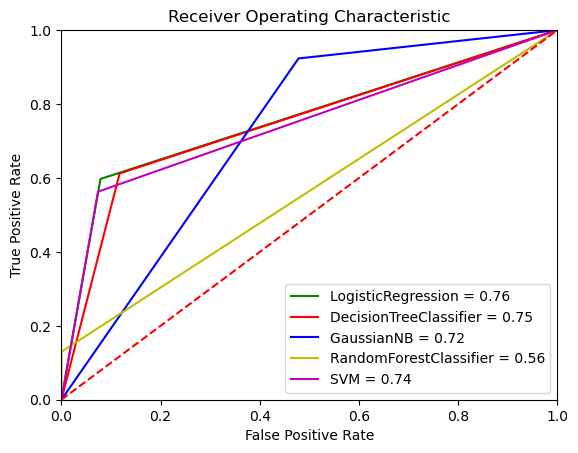

In [19]:
# Plot ROC
fpr = dict()
tpr = dict()
roc_auc = dict()


fpr, tpr, threshold = roc_curve(y_test, y_pred[0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'LogisticRegression = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_pred[1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'r', label = 'DecisionTreeClassifier = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_pred[2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'GaussianNB = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_pred[3])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'y', label = 'RandomForestClassifier = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_pred[4])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color ='m', label = 'SVM = %0.2f' % roc_auc)


plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Exercise 5 Evaluating Model 

## Question:
### Q1: